In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import utils
import sir_model

In [3]:
M, N, p_conn = 10, 750, 0.05 # very sparse, as 0.01 gives us on average every GC connects to 1 MC.
max_lim = 0.5 # for each entry Wnm the max connection strength

W = utils.create_network(M, N, p_conn, max_lim)

Max number of non zero GC connections 3
Average number of non zero GC connections 0.4693333333333333
Max strength of GC connections 0.8918735080294229
Average strength of GC connections 0.1149090052344403


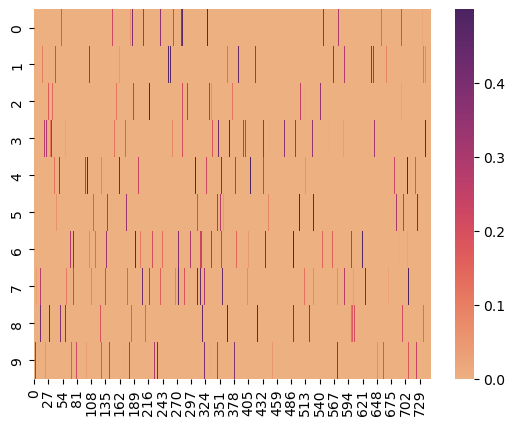

In [4]:
sns.heatmap(W,cmap = 'flare')
plt.show()

In [5]:
list1 = np.linspace(0.01, 1, M)
odor1 = [x**2 for x in list1]
odor2 = [x**2 for x in list1[::-1]]
odors = np.array([odor1, odor2])

theta = .3
GC_responpse = utils.get_GCact(W, odors.T, theta)

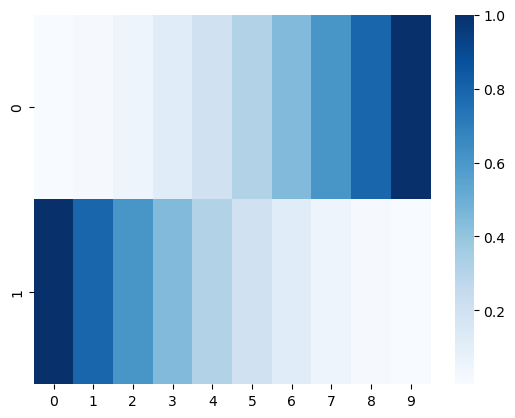

In [6]:
sns.heatmap(odors, cmap = 'Blues')
plt.show()

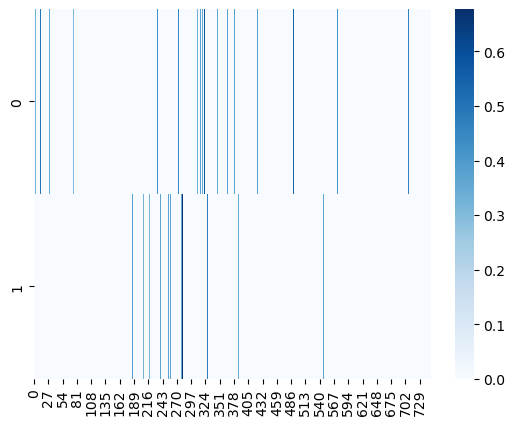

In [7]:
sns.heatmap(GC_responpse.T, cmap = 'Blues')
plt.show()

In [8]:
etas = {'associate': 0.005, 
        'disassociate':0.005, 
        'forget':0.0005}

In [10]:
GC_act_1 = GC_responpse[:,0]
GC_act_2= GC_responpse[:,1]


for k in range(1000):
    if k%2:
        GC_act_1 = sir_model.sniff_cycle(odor1, GC_act_1, theta, W)
        sir_model.hebbian_update(W, GC_act_1, odor1, etas, cap = True, cap_strength = 1)

    else: 
        GC_act_2 = sir_model.sniff_cycle(odor2, GC_act_2, theta, W)
        sir_model.hebbian_update(W, GC_act_2, odor2, etas, cap = True, cap_strength = 1)  
    

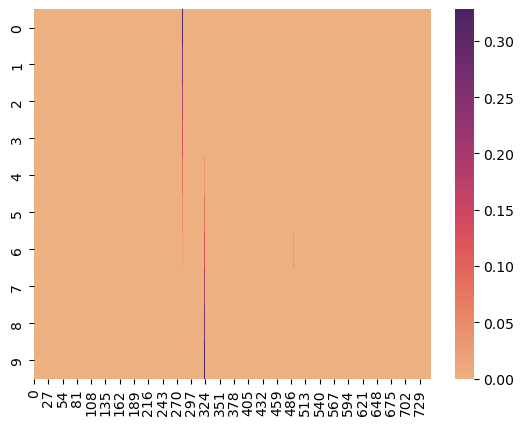

In [11]:
sns.heatmap(W,cmap = 'flare')
plt.show()